<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/lab1_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/01_final_wheat_data.xlsx - final_wheat_data (1).csv")
df.head()

,commodity,category,item,item2,units,size,region,country,year,value,survey_base_year,note
0,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1998.0,110.95,Base survey of 1998,NaN
1,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,1999.0,95.73,Base survey of 1998,NaN
2,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2000.0,92.50,Base survey of 1998,NaN
3,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2001.0,95.22,Base survey of 1998,NaN
4,Wheat,Gross value of production,"Primary product, grain","Primary product, grain",dollars per planted acre,No specific size,U.S. total,United States,2002.0,91.51,Base survey of 1998,NaN


In [3]:
df.columns

Index(['commodity', 'category', 'item', 'item2', 'units', 'size', 'region',
       'country', 'year', 'value', 'survey_base_year', 'note'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   commodity         6003 non-null   object 
 1   category          6003 non-null   object 
 2   item              6000 non-null   object 
 3   item2             6001 non-null   object 
 4   units             6002 non-null   object 
 5   size              5999 non-null   object 
 6   region            6001 non-null   object 
 7   country           6001 non-null   object 
 8   year              5999 non-null   float64
 9   value             6003 non-null   float64
 10  survey_base_year  6003 non-null   object 
 11  note              618 non-null    object 
dtypes: float64(2), object(10)
memory usage: 562.9+ KB


In [5]:
df.isna().sum()

,0
commodity,0
category,0
item,3
item2,2
units,1
size,4
region,2
country,2
year,4
value,0


In [6]:
df.describe()

,year,value
count,5999.000000,6003.000000
mean,2010.320053,75.708191
std,7.937081,129.087266
min,1998.000000,-196.080000
25%,2003.000000,6.315000
50%,2010.000000,20.920000
75%,2017.000000,95.000000
max,2024.000000,858.000000


In [7]:
# print(f'Car_Name : {df['Car_Name'].unique()}')
all_cols = df.columns

for i in all_cols:
  print(f'{i} : {df[i].unique()}\n\n')

commodity : ['Wheat']


category : ['Gross value of production' 'Operating costs' 'Allocated overhead'
 'Costs listed' 'Net value' 'Supporting information'
 'Production practices']


item : ['Primary product, grain' nan 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer 鹿' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses 虏' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Winter wheat 鲁' 'Spring wheat'
 'Spring wheat 鲁' 'Durum wheat' 'Durum wheat 鲁' 'Dryland' 'Dryland 鲁'
 'Irrigated' 'Irrigated 鲁']


item2 : ['Primary product, gra

In [8]:
import re
# 2. Define a cleaning function
def clean_text(text):
    # Handle NaN values (if the cell is empty, return it as is)
    if pd.isna(text):
        return text

    # Step A: Remove non-ASCII characters (matches 鹿, 虏, 鲁, etc.)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Step B: Remove anything inside parentheses, including the parentheses
    # This handles "(percent of acres)", "(dollars per bushel...)", etc.
    text = re.sub(r'\s*\(.*?\)', '', text)

    # Step C: Strip extra whitespace from the ends
    return text.strip()

# 3. Apply the function to your columns
df['item'] = df['item'].apply(clean_text)
df['item2'] = df['item2'].apply(clean_text)



In [9]:
# print(f'Car_Name : {df['Car_Name'].unique()}')
all_cols = df.columns

for i in all_cols:
  print(f'{i} : {df[i].unique()}\n\n')

#to remove=> commodity, size, country

commodity : ['Wheat']


category : ['Gross value of production' 'Operating costs' 'Allocated overhead'
 'Costs listed' 'Net value' 'Supporting information'
 'Production practices']


item : ['Primary product, grain' nan 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Spring wheat' 'Durum wheat' 'Dryland'
 'Irrigated']


item2 : ['Primary product, grain' nan 'Secondary product, silage/straw/grazing'
 'Total, gross value of product

In [10]:
def clean_note(text):
    # Handle NaN values (if the cell is empty, return it as is)
    if pd.isna(text):
        return text

    # Step A: Remove non-ASCII characters (matches 鹿, 虏, 鲁, etc.)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Step C: Strip extra whitespace from the ends
    return text.strip()

# 3. Apply the function to your columns
df['note'] = df['note'].apply(clean_note)


In [11]:
df['note'].value_counts()

,count
note,
"For 2022-2024 estimates, insufficient data for disclosure.",216
"Cost of commercial fertilizers, soil conditioners, and manure.",201
Cost of purchased irrigation water and straw baling.,201


In [12]:
# 1. Define the simpler function
def extract_year_simple(text):
    if pd.isna(text):
        return None

    # Split the string by spaces and take the last element [-1]
    year_str = text.split()[-1]

    # Return as integer
    return int(year_str)

# 2. Apply it to your DataFrame
df['survey_base_year'] = df['survey_base_year'].apply(extract_year_simple)

# Check the result
print(df['survey_base_year'].unique())

[1998 2004 2009 2017 2022]


In [13]:
# print(f'Car_Name : {df['Car_Name'].unique()}')
all_cols = df.columns

for i in all_cols:
  print(f'{i} : {df[i].unique()}\n\n')

commodity : ['Wheat']


category : ['Gross value of production' 'Operating costs' 'Allocated overhead'
 'Costs listed' 'Net value' 'Supporting information'
 'Production practices']


item : ['Primary product, grain' nan 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Spring wheat' 'Durum wheat' 'Dryland'
 'Irrigated']


item2 : ['Primary product, grain' nan 'Secondary product, silage/straw/grazing'
 'Total, gross value of product

In [14]:
columns_to_drop = ['size', 'commodity']
df = df.drop(columns=columns_to_drop)


In [15]:
import pandas as pd
import numpy as np

# 1. Define the logic to combine the columns
def combine_columns(row):
    val1 = row['item']
    val2 = row['item2']

    # Handle NaN (Missing values) cases first to avoid errors
    if pd.isna(val1) and pd.isna(val2):
        return np.nan
    if pd.isna(val1):
        return val2
    if pd.isna(val2):
        return val1

    # Main Logic: Check if they are the same
    # We convert to string to ensure safe comparison
    if str(val1).strip() == str(val2).strip():
        return val1
    else:
        # If different, combine them (I added a space separator for readability)
        return f"{val1} {val2}"

# 2. Apply this logic row by row (axis=1)
df['item'] = df.apply(combine_columns, axis=1)

# 3. Drop the 'item2' column since it is no longer needed
df.drop(columns=['item2'], inplace=True)


print(df['item'].unique())

['Primary product, grain' 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Spring wheat' 'Durum wheat' 'Dryland'
 'Irrigated']


In [16]:
# print(f'Car_Name : {df['Car_Name'].unique()}')
all_cols = df.columns

for i in all_cols:
  print(f'{i} : {df[i].unique()}\n\n')

category : ['Gross value of production' 'Operating costs' 'Allocated overhead'
 'Costs listed' 'Net value' 'Supporting information'
 'Production practices']


item : ['Primary product, grain' 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Spring wheat' 'Durum wheat' 'Dryland'
 'Irrigated']


units : ['dollars per planted acre' nan 'bushels per planted acre'
 'dollars per bushel at harvest' 'planted acres' 'percent of acres']


r

In [17]:
df.shape

(6003, 9)

In [18]:
df.isna().sum()

,0
category,0
item,0
units,1
region,2
country,2
year,4
value,0
survey_base_year,0
note,5385


In [19]:
df['note'] = df['note'].fillna('NA')


In [20]:
df.isna().sum()

,0
category,0
item,0
units,1
region,2
country,2
year,4
value,0
survey_base_year,0
note,0


In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(5996, 9)

In [23]:
# print(f'Car_Name : {df['Car_Name'].unique()}')
all_cols = df.columns

for i in all_cols:
  print(f'{i} : {df[i].unique()}\n\n')

category : ['Gross value of production' 'Operating costs' 'Allocated overhead'
 'Costs listed' 'Net value' 'Supporting information'
 'Production practices']


item : ['Primary product, grain' 'Secondary product, silage/straw/grazing'
 'Total, gross value of production' 'Seed' 'Fertilizer' 'Chemicals'
 'Custom services' 'Fuel, lube, and electricity' 'Repairs'
 'Other variable expenses' 'Interest on operating inputs'
 'Total, operating costs' 'Hired labor' 'Opportunity cost of unpaid labor'
 'Capital recovery of machinery and equipment' 'Opportunity cost of land'
 'Taxes and insurance' 'General farm overhead' 'Total, allocated overhead'
 'Total, costs listed' 'Value of production less total costs listed'
 'Value of production less operating costs' 'Yield' 'Price'
 'Enterprise size' 'Winter wheat' 'Spring wheat' 'Durum wheat' 'Dryland'
 'Irrigated']


units : ['dollars per planted acre' 'bushels per planted acre'
 'dollars per bushel at harvest' 'planted acres' 'percent of acres']


regio

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5996 entries, 0 to 6002
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          5996 non-null   object 
 1   item              5996 non-null   object 
 2   units             5996 non-null   object 
 3   region            5996 non-null   object 
 4   country           5996 non-null   object 
 5   year              5996 non-null   float64
 6   value             5996 non-null   float64
 7   survey_base_year  5996 non-null   int64  
 8   note              5996 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 468.4+ KB


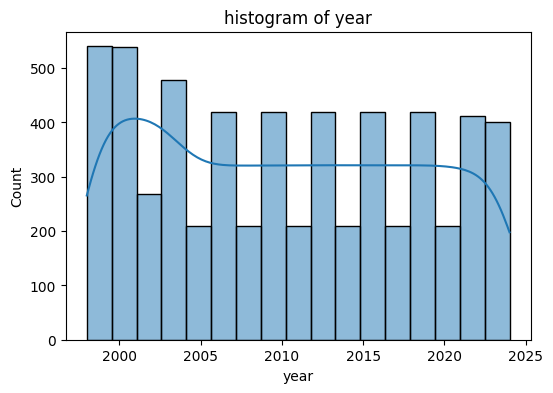

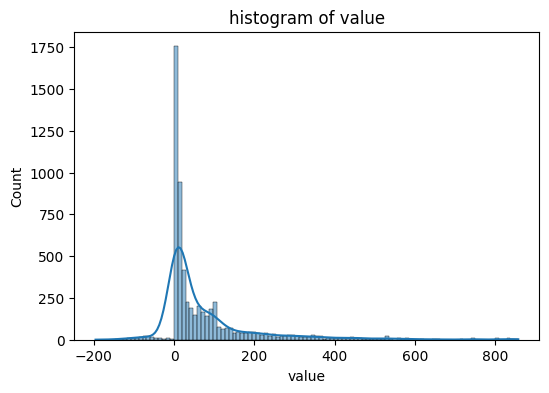

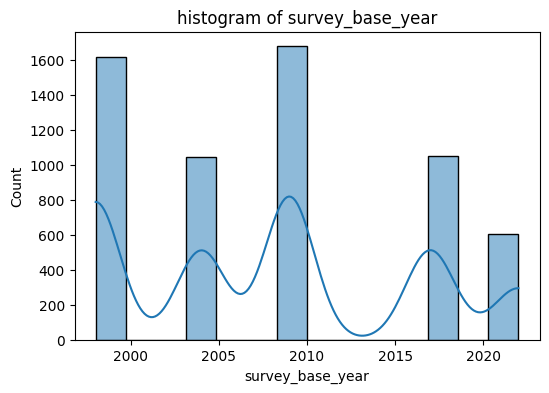

In [25]:
for col in df.select_dtypes(include =['int64','float64']).columns:
  plt.figure(figsize=(6,4))
  sns.histplot(x=df[col],kde=True)
  plt.title(f"histogram of {col}")
  plt.show()

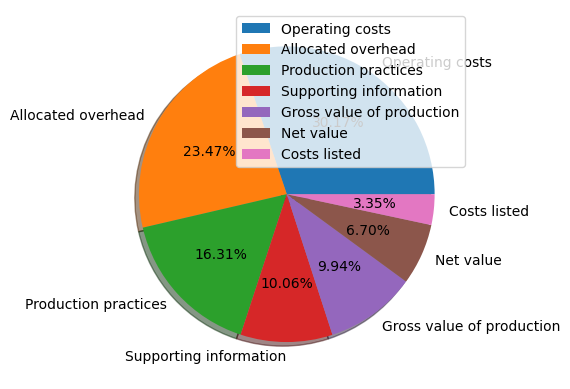

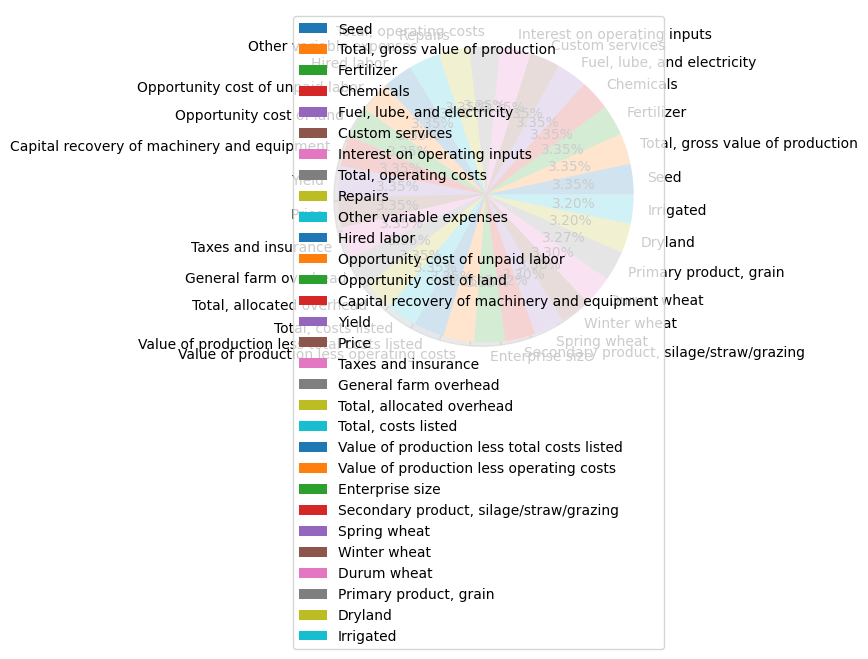

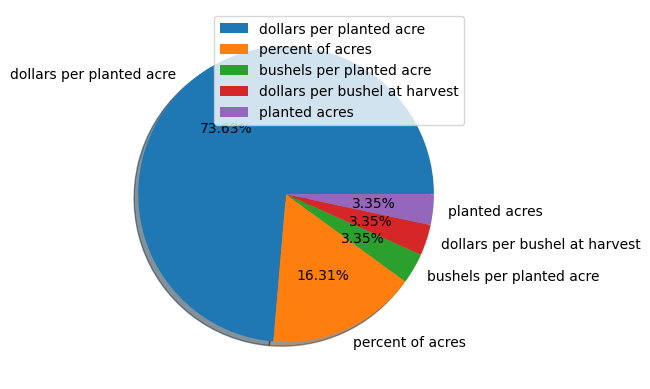

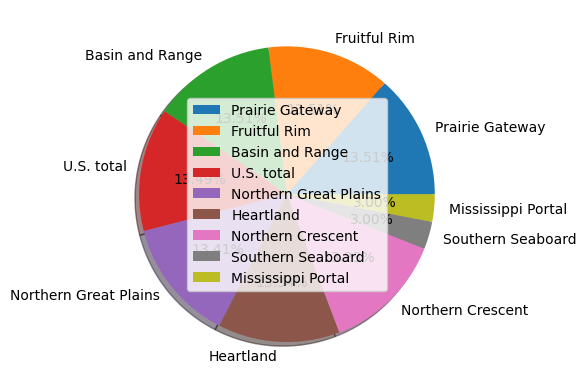

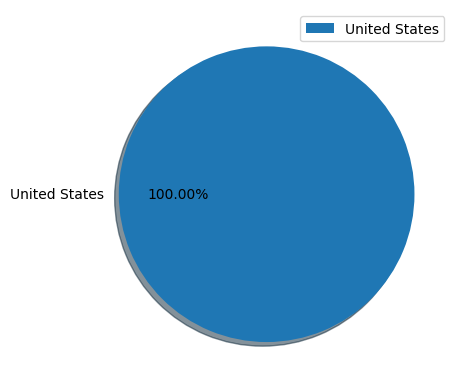

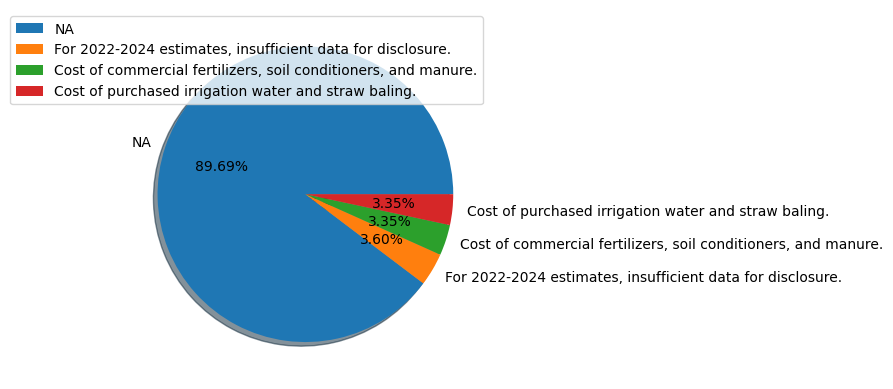

In [27]:
for col in df.select_dtypes(include =['object']).columns:
  plt.pie(df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.2f%%')
  plt.legend()
  plt.show()


In [28]:
columns_to_drop = ['country']
df = df.drop(columns=columns_to_drop)

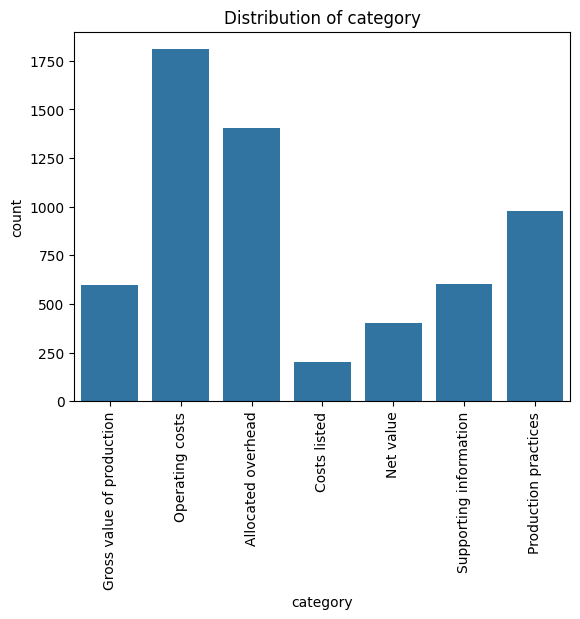

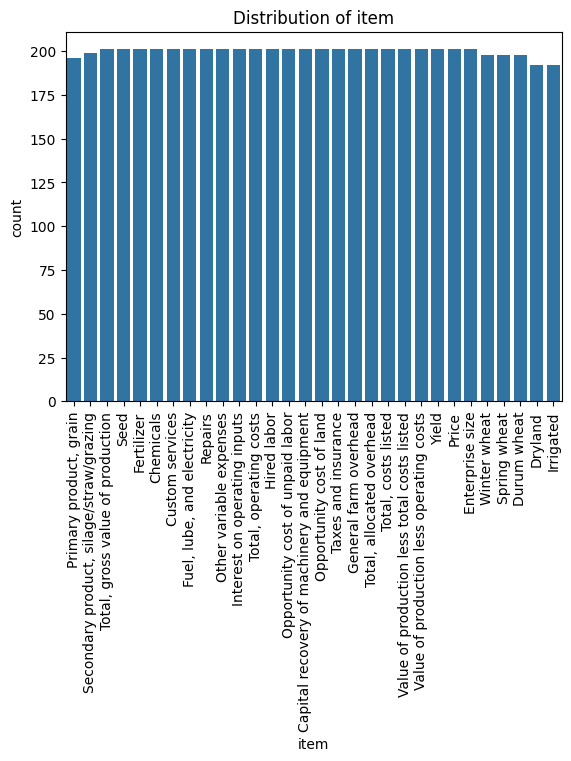

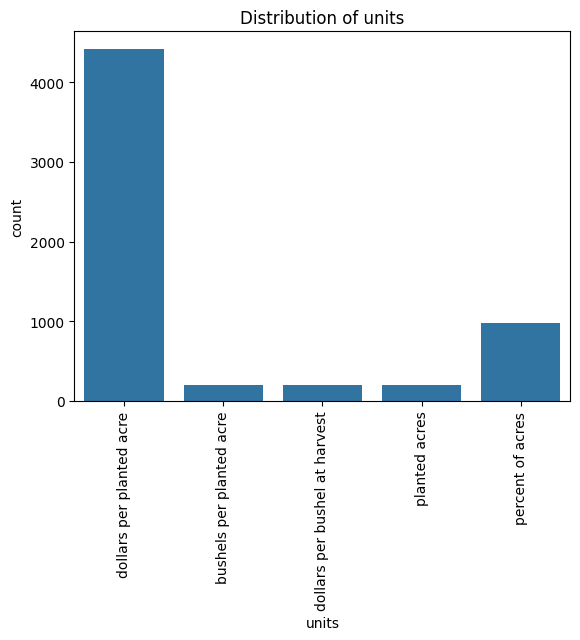

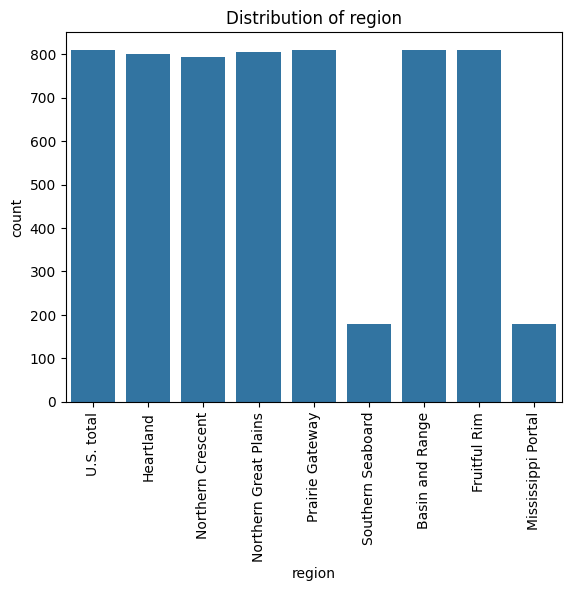

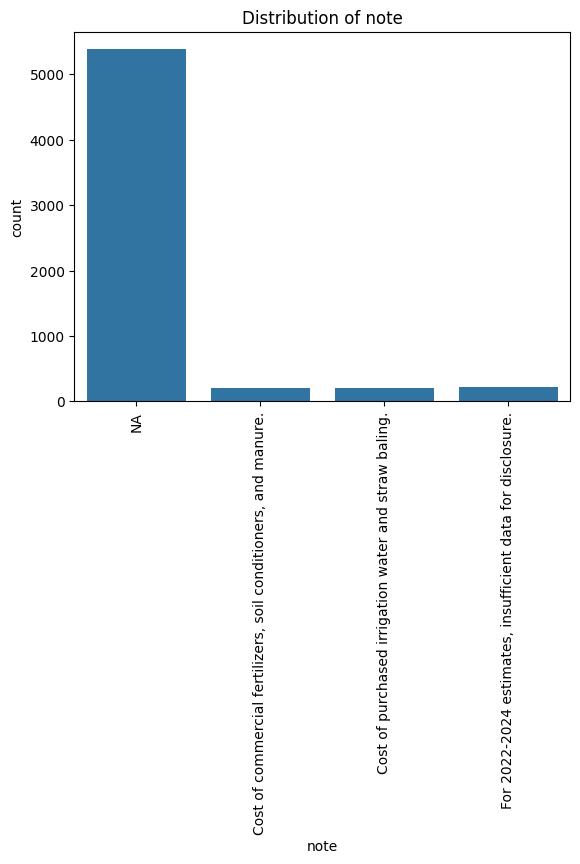

In [32]:
for col in df.select_dtypes(include =['object']).columns:
  sns.countplot(x = col, data = df)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=90)
  plt.show()

<Axes: xlabel='year'>

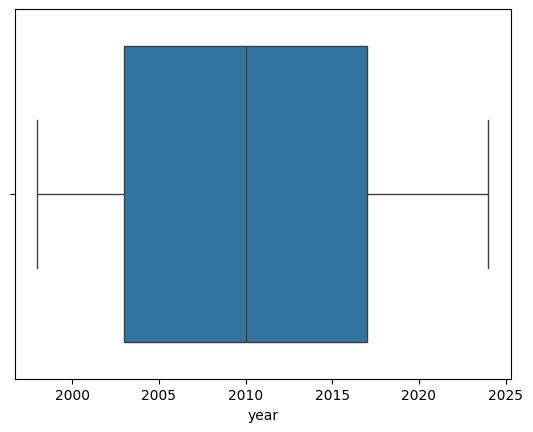

In [33]:
sns.boxplot(x = 'year',data = df)

<Axes: xlabel='value'>

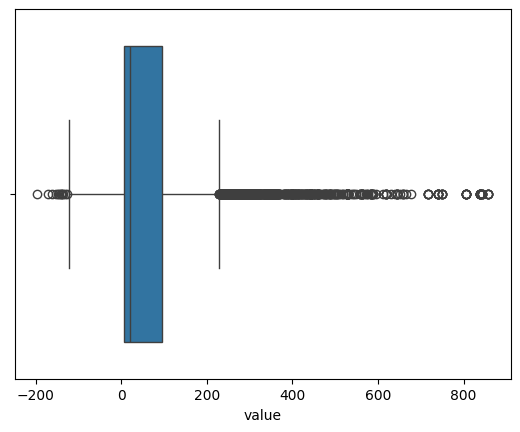

In [34]:
sns.boxplot(x = 'value',data = df)

<Axes: >

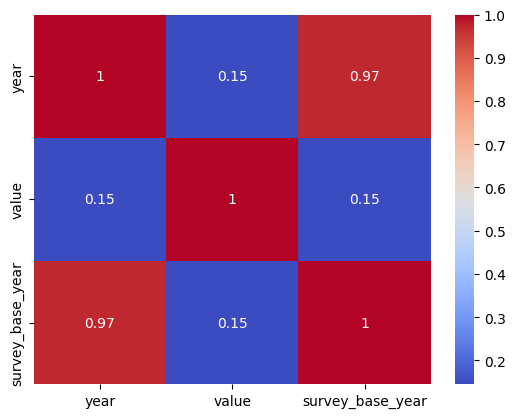

In [38]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm')

In [39]:
columns_to_drop = ['survey_base_year']
df = df.drop(columns=columns_to_drop)

<Axes: >

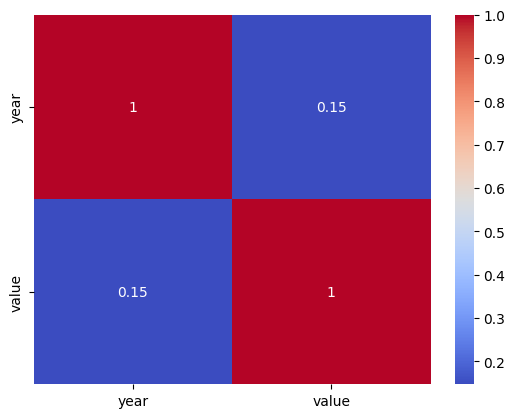

In [40]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm')

In [41]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,year,value,category_Costs listed,category_Gross value of production,category_Net value,category_Operating costs,category_Production practices,category_Supporting information,item_Chemicals,item_Custom services,...,region_Heartland,region_Mississippi Portal,region_Northern Crescent,region_Northern Great Plains,region_Prairie Gateway,region_Southern Seaboard,region_U.S. total,note_Cost of purchased irrigation water and straw baling.,"note_For 2022-2024 estimates, insufficient data for disclosure.",note_NA
0,1998.0,110.95,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1999.0,95.73,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2000.0,92.50,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2001.0,95.22,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2002.0,91.51,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5996 entries, 0 to 6002
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   year                                                             5996 non-null   float64
 1   value                                                            5996 non-null   float64
 2   category_Costs listed                                            5996 non-null   bool   
 3   category_Gross value of production                               5996 non-null   bool   
 4   category_Net value                                               5996 non-null   bool   
 5   category_Operating costs                                         5996 non-null   bool   
 6   category_Production practices                                    5996 non-null   bool   
 7   category_Supporting information                

In [43]:
# Identify columns with 'bool' dtype and convert them to 'int'
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,year,value,category_Costs listed,category_Gross value of production,category_Net value,category_Operating costs,category_Production practices,category_Supporting information,item_Chemicals,item_Custom services,...,region_Heartland,region_Mississippi Portal,region_Northern Crescent,region_Northern Great Plains,region_Prairie Gateway,region_Southern Seaboard,region_U.S. total,note_Cost of purchased irrigation water and straw baling.,"note_For 2022-2024 estimates, insufficient data for disclosure.",note_NA
0,1998.0,110.95,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1999.0,95.73,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2000.0,92.50,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2001.0,95.22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2002.0,91.51,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [44]:
df.columns

Index(['year', 'value', 'category_Costs listed',
       'category_Gross value of production', 'category_Net value',
       'category_Operating costs', 'category_Production practices',
       'category_Supporting information', 'item_Chemicals',
       'item_Custom services', 'item_Dryland', 'item_Durum wheat',
       'item_Enterprise size', 'item_Fertilizer',
       'item_Fuel, lube, and electricity', 'item_General farm overhead',
       'item_Hired labor', 'item_Interest on operating inputs',
       'item_Irrigated', 'item_Opportunity cost of land',
       'item_Opportunity cost of unpaid labor', 'item_Other variable expenses',
       'item_Price', 'item_Primary product, grain', 'item_Repairs',
       'item_Secondary product, silage/straw/grazing', 'item_Seed',
       'item_Spring wheat', 'item_Taxes and insurance',
       'item_Total, allocated overhead', 'item_Total, costs listed',
       'item_Total, gross value of production', 'item_Total, operating costs',
       'item_Value of pr

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['year'] # Columns to scale

# Update only specific columns in your existing DataFrame
df[num_cols] = scaler.fit_transform(df[num_cols])


In [46]:
# X = All columns except the target
X = df.drop('value', axis=1)

# y = Only the target column
y = df['value']


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import joblib
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "SGD Regressor": SGDRegressor(max_iter=10000, tol=0.000001, random_state=42),
    "Lasso Regression": Lasso(alpha=0.01, random_state=42)
}

print("\n--- Model Evaluation ---")
for name, model in models.items():
    # Create a pipeline that first preprocesses the data, then runs the model
    pipeline = Pipeline(steps=[('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Square root of MSE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate Adjusted R2
    n = X_test.shape[0] # Number of observations
    p = X_test.shape[1] # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"{name}:")
    print(f"  R2: {r2:.4f} | Adj R2: {adj_r2:.4f}")
    print(f"  MAE: {mae:.2f} | RMSE: {rmse:.2f}")
    print("-" * 30)




--- Model Evaluation ---
Linear Regression:
  R2: 0.7469 | Adj R2: 0.7357
  MAE: 34.47 | RMSE: 65.61
------------------------------
SGD Regressor:
  R2: 0.7464 | Adj R2: 0.7351
  MAE: 34.10 | RMSE: 65.68
------------------------------
Lasso Regression:
  R2: 0.7469 | Adj R2: 0.7356
  MAE: 34.46 | RMSE: 65.62
------------------------------


In [54]:
# f) Tune Hyperparameter (Example: Tuning 'alpha' for Lasso)
print("\n--- Hyperparameter Tuning (Lasso) ---")
param_grid = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}

# Grid Search will try all alpha values and find the best one
grid_search = GridSearchCV(
    Pipeline(steps=[('model', Lasso(random_state=42))]),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)
print(f"Best Alpha: {grid_search.best_params_['model__alpha']}")




--- Hyperparameter Tuning (Lasso) ---
Best Alpha: 0.01


In [55]:
# g) Save the Model parameter
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'wheat_cost_model.pkl')
print("Model saved as 'wheat_cost_model.pkl'")

Model saved as 'wheat_cost_model.pkl'
